Dewi Henry
June 23. 2020
subtracting TanDEM-X raster that depicts suface elevation including tree canopy from the year 2015and man made buildings from GEBCO DEM which uses SRTM that collects surface elevation from the year 2000

In [213]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from pathlib import Path
import geopandas as gpd
from osgeo import gdal
import re
import subprocess

In [214]:
import numpy as np
import os
import glob
from pathlib import Path
import geopandas as gpd
from osgeo import gdal
import re
import subprocess
import matplotlib.pyplot as plt

In [192]:
outpath = '/users/dewihenry/jpl/python/canopy_height/output2/'
#gebco_data = '/users/dewihenry/jpl/python/data_canopy_height/mekong_gebco.tif'
delta = "ganges"
print(outpath)

/users/dewihenry/jpl/python/canopy_height/output2/


In [180]:
tdx_data = Path('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-' + delta + '/').glob('*/*.tif')
tdx_data = sorted(tdx_data, key= lambda x: x.name)
tdx_data

[PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E087_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E088_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E089_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E090_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E091_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E092_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E087_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E088_DEM.tif'),
 PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E089_DEM.tif'),
 PosixPath

In [181]:
tdx_str = str(tdx_data)
print (tdx_str)
tdx_str1 = tdx_str.replace ("('","<")
tdx_str2 = tdx_str1.replace("tif","tif>")

[PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E087_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E088_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E089_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E090_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E091_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E092_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E087_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E088_DEM.tif'), PosixPath('/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E089_DEM.tif'), PosixPath('/users/

In [182]:
tdx_new = re.findall(r'<(.+?)>',tdx_str2)
tdx_new

['/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E087_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E088_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E089_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E090_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E091_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E092_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E087_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E088_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E089_DEM.tif',
 '/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E090_DEM.tif',
 '/users/d

In [184]:
tdx_filestring = " " .join(tdx_new)
tdx_filestring

'/users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E087_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E088_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E089_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E090_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E091_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N21E092_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E087_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E088_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E089_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_data/tdx-ganges/dem/TDM1_DEM__30_N22E090_DEM.tif /users/dewihenry/jpl/python/canopy_height/tdx_dat

In [194]:
ndv = str( np.nan)
tdx_merge = outpath + "tdx_" + delta  + ".tif"
cmd = "../../opt/anaconda3/bin/gdal_merge.py -n -32767 -a_nodata " + ndv + " -o " + tdx_merge + " " + tdx_filestring 
!{cmd}

0...10...20...30...40...50...60...70...80...90...100 - done.


In [195]:
print(tdx_merge)

/users/dewihenry/jpl/python/canopy_height/output2/tdx_ganges.tif


now I have merged TanDEM-X data going to change the CRS to EMG96

In [196]:
#-dstnodata 0
tdx_egm = outpath + "tdx_egm.tif"
cmd = "../../opt/anaconda3/bin/gdalwarp -s_srs EPSG:4326+4979 -t_srs EPSG:4326+5773 " + tdx_merge + " " + tdx_egm
!{cmd}

Creating output file that is 7201P x 6001L.
Processing /users/dewihenry/jpl/python/canopy_height/output2/tdx_ganges.tif [1/1] : 0Using internal nodata values (e.g. nan) for image /users/dewihenry/jpl/python/canopy_height/output2/tdx_ganges.tif.
Copying nodata values from source /users/dewihenry/jpl/python/canopy_height/output2/tdx_ganges.tif to destination /users/dewihenry/jpl/python/canopy_height/output2/tdx_egm.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


GEBCO EGM

In [197]:
gebco = '/users/dewihenry/jpl/python/canopy_height/' + delta + '.tif'
print(gebco)

/users/dewihenry/jpl/python/canopy_height/ganges.tif


converting the GEBCO DEM from WGS84 to have a verticle datum of EGM96

In [198]:
gebco_egm = outpath + "gebco_egm.tif"
cmd = "../../opt/anaconda3/bin/gdalwarp -dstnodata 0 -s_srs EPSG:4326+4979 -t_srs EPSG:4326+5773 " + gebco + " " + gebco_egm
!{cmd}

Processing /users/dewihenry/jpl/python/canopy_height/ganges.tif [1/1] : 0Using internal nodata values (e.g. -32767) for image /users/dewihenry/jpl/python/canopy_height/ganges.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


Cropping the extent of TanDEM-X data and re sampleing 

In [217]:
#put in extent xmin, ymin, xmax, ymax
xy = "87.70 21.5 91.75 25.5 "
croppedtdx = outpath + 'tdx_cropped'
extent = "../../opt/anaconda3/bin/gdalwarp -te " + xy + tdx_egm + " " + croppedtdx
!{extent}

ERROR 1: Output dataset /users/dewihenry/jpl/python/canopy_height/output2/tdx_cropped exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



In [201]:
ds=gdal.Open(croppedtdx)
d=ds.GetGeoTransform()
p=ds.GetProjection()
print(d)
print(ds.GetGeoTransform)
print(p)

(87.7, 0.0008333333333333327, 0.0, 25.5, 0.0, -0.0008333333333333334)
<bound method Dataset.GetGeoTransform of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x10f2e3c30> >>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [202]:
resample_alg = 'bilinear'
xres =0.00027777
yres =0.00027777
tdx_resampled= outpath + 'tdx_resampled.tif'

In [203]:
ds = gdal.Warp(tdx_resampled, 
               croppedtdx, 
               format = 'GTiff', 
                xRes=xres, 
                yRes=yres,
               resampleAlg=resample_alg, 
               dstNodata = 0)
ds = None

In [215]:
print(extent)

../../opt/anaconda3/bin/gdalwarp -te ../../opt/anaconda3/bin/gdalwarp -te ../../opt/anaconda3/bin/gdalwarp -te ../../opt/anaconda3/bin/gdalwarp -te ../../opt/anaconda3/bin/gdalwarp -te 104 8 106 11 /users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif/users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif/users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif/users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif/users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif


### cropping extent of GEBCO data and resampling 

In [218]:
gebco_cropped =  outpath + "gebco_cropped.tif"
extent = "../../opt/anaconda3/bin/gdalwarp -te " + xy + gebco_egm + " " + gebco_cropped
!{extent}

Creating output file that is 972P x 960L.
Processing /users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif [1/1] : 0Using internal nodata values (e.g. 0) for image /users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif.
Copying nodata values from source /users/dewihenry/jpl/python/canopy_height/output2/gebco_egm.tif to destination /users/dewihenry/jpl/python/canopy_height/output2/gebco_cropped.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [219]:
gebco_resampled = outpath + 'gebco_resampled.tif'
ss = gdal.Warp(gebco_resampled, 
               gebco_cropped, 
               format = 'GTiff', 
                xRes=xres, 
                yRes=yres,
               resampleAlg=resample_alg, 
               dstNodata = 0)
ss = None

In [220]:
all_gebco = []
gebco = gdal.Open(gebco_resampled, gdal.GA_ReadOnly)
gebcoimage= gebco.ReadAsArray()
all_gebco.append(gebcoimage)
print(gebcoimage.shape)
plt.figure()
print(all_gebco)

(14400, 14580)
[array([[   0,    0,    0, ..., 1792, 1792, 1792],
       [   0,    0,    0, ..., 1792, 1792, 1792],
       [   0,    0,    0, ..., 1792, 1792, 1792],
       ...,
       [   0,    0,    0, ...,   48,   48,   48],
       [   0,    0,    0, ...,   48,   48,   48],
       [   0,    0,    0, ...,   48,   48,   48]], dtype=int16)]


<Figure size 432x288 with 0 Axes>

In [221]:
all_tdx = []
tdx = gdal.Open(tdx_resampled, gdal.GA_ReadOnly)
tdximage = tdx.ReadAsArray()
all_tdx.append(tdximage)
print(tdximage.shape)
plt.figure()
print(all_tdx)

(14400, 14580)
[array([[  32.657578,   32.657578,   32.368694, ..., 1739.3049  ,
        1745.9419  , 1748.6511  ],
       [  32.657578,   32.657578,   32.368694, ..., 1739.3049  ,
        1745.9419  , 1748.6511  ],
       [  33.18129 ,   33.18129 ,   33.08394 , ..., 1748.4423  ,
        1753.6259  , 1755.7418  ],
       ...,
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ]], dtype=float32)]


<Figure size 432x288 with 0 Axes>

In [222]:
type(tdx), type(tdximage)

(osgeo.gdal.Dataset, numpy.ndarray)

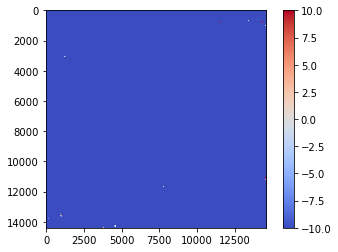

In [225]:
diff= tdximage - gebcoimage
plt.figure()
plt.imshow(diff, cmap = "coolwarm", vmin= -10, vmax= 10)
plt.colorbar()
plt.show()

In [226]:
[dx , dy] = tdximage.shape
print(dx, dy)
outFileName = outpath + "diff.tif"
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, dy, dx)

outdata.SetGeoTransform(d)##sets same geotransform as input
outdata.SetProjection(p)##sets same projection as input

outband = outdata.GetRasterBand(1)
outband.WriteArray(diff)
outdata = None


14400 14580
